In [148]:
#Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [149]:
df1 = pd.read_csv('D:\\Springboard\\Technical Project\\25_Relax Inc. Take-Home Challenge\\relax_challenge\\takehome_user_engagement.csv')
df1.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [150]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [151]:
# Converting time_stamp to datetime object
df1['time_stamp'] = pd.to_datetime(df1['time_stamp'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [152]:
df1.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [153]:
df1['user_id'].nunique()

8823

The data is available for only 8823 users and not 12000 users though user_id ranges from 1 to 12000

In [154]:
# Setting the index of dataframe to datetime for further analysis
df1.set_index('time_stamp', inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207917 entries, 2014-04-22 03:53:30 to 2014-01-26 08:57:12
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  207917 non-null  int64
 1   visited  207917 non-null  int64
dtypes: int64(2)
memory usage: 4.8 MB


In [155]:
# Let's resample the data to daily for defining the adopted user
df2 = pd.DataFrame()
for id in df1['user_id'].unique():
    df2 = df2.append(df1[df1['user_id']==id].resample('D').mean())
df2.dropna(inplace=True)

In [156]:
df2.head(20)

,user_id,visited
time_stamp,,
2014-04-22,1.0,1.0
2013-11-15,2.0,1.0
2013-11-29,2.0,1.0
2013-12-09,2.0,1.0
2013-12-25,2.0,1.0
2013-12-31,2.0,1.0
2014-01-08,2.0,1.0
2014-02-03,2.0,1.0
2014-02-08,2.0,1.0


In [157]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207917 entries, 2014-04-22 to 2014-01-26
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  207917 non-null  float64
 1   visited  207917 non-null  float64
dtypes: float64(2)
memory usage: 4.8 MB


In [158]:
# Creating a dataframe for identifying whether a user is adopted user or not
from datetime import timedelta
df3 = pd.DataFrame()
for id in df2['user_id'].unique():
    adopted_user=0
    if len(df2[df2['user_id']==id])<3:
        adopted_user=0
    else:
        for i in range(len(df2[df2['user_id']==id])-2):
            if df2[df2['user_id']==id].index[i+2]-df2[df2['user_id']==id].index[i] <= timedelta(days=7):
                adopted_user=1
                break
    df3 = df3.append(pd.DataFrame([{'user_id':id, 'adopted_user':adopted_user}]))

In [159]:
df3.head()

,user_id,adopted_user
0,1.0,0
0,2.0,1
0,3.0,0
0,4.0,0
0,5.0,0


In [160]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 0
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       8823 non-null   float64
 1   adopted_user  8823 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 206.8 KB


In [161]:
df3['adopted_user'].sum()

1656

Hence there are ony 1656 out of 8823 users who are adopted user

In [162]:
data = pd.read_csv('D:\\Springboard\\Technical Project\\25_Relax Inc. Take-Home Challenge\\relax_challenge\\takehome_users.csv', encoding='latin-1')
data.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [164]:
data.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [165]:
# Let's merge the adopted user column to our data
data = pd.merge(data, df3, left_on='object_id', right_on='user_id', how='inner')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   8823 non-null   int64  
 1   creation_time               8823 non-null   object 
 2   name                        8823 non-null   object 
 3   email                       8823 non-null   object 
 4   creation_source             8823 non-null   object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    8823 non-null   int64  
 7   enabled_for_marketing_drip  8823 non-null   int64  
 8   org_id                      8823 non-null   int64  
 9   invited_by_user_id          4776 non-null   float64
 10  user_id                     8823 non-null   float64
 11  adopted_user                8823 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 896.1+ KB


#### Data Wrangling

In [166]:
# Firstly let's remove the unwanted ccolumns like name, email, user_id(since it's repeated)
data.drop(columns=['user_id', 'name', 'email'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   8823 non-null   int64  
 1   creation_time               8823 non-null   object 
 2   creation_source             8823 non-null   object 
 3   last_session_creation_time  8823 non-null   float64
 4   opted_in_to_mailing_list    8823 non-null   int64  
 5   enabled_for_marketing_drip  8823 non-null   int64  
 6   org_id                      8823 non-null   int64  
 7   invited_by_user_id          4776 non-null   float64
 8   adopted_user                8823 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 689.3+ KB


In [167]:
# Convert creation time to datetime object
data['creation_time'] = pd.to_datetime(data['creation_time'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   8823 non-null   int64         
 1   creation_time               8823 non-null   datetime64[ns]
 2   creation_source             8823 non-null   object        
 3   last_session_creation_time  8823 non-null   float64       
 4   opted_in_to_mailing_list    8823 non-null   int64         
 5   enabled_for_marketing_drip  8823 non-null   int64         
 6   org_id                      8823 non-null   int64         
 7   invited_by_user_id          4776 non-null   float64       
 8   adopted_user                8823 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(1)
memory usage: 689.3+ KB


In [168]:
# Convert last session creation time to datetime object
data['last_session_creation_time'] = pd.to_datetime(data['last_session_creation_time'], unit='s')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   8823 non-null   int64         
 1   creation_time               8823 non-null   datetime64[ns]
 2   creation_source             8823 non-null   object        
 3   last_session_creation_time  8823 non-null   datetime64[ns]
 4   opted_in_to_mailing_list    8823 non-null   int64         
 5   enabled_for_marketing_drip  8823 non-null   int64         
 6   org_id                      8823 non-null   int64         
 7   invited_by_user_id          4776 non-null   float64       
 8   adopted_user                8823 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(5), object(1)
memory usage: 689.3+ KB


In [169]:
data.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0


In [170]:
# Create a feature called usage_history by subtracting creation_time from last_session_creation time and drop these two columns
data['usage_history'] = data['last_session_creation_time']-data['creation_time']
data['usage_history'].head()

0     0 days
1   136 days
2     0 days
3     1 days
4     5 days
Name: usage_history, dtype: timedelta64[ns]

In [171]:
# Converting usage_istory to int
data['usage_history'] = data['usage_history'].dt.days
data.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,usage_history
0,1,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0,0
1,2,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1,136
2,3,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0,0
3,4,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0,1
4,5,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0,5


In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   8823 non-null   int64         
 1   creation_time               8823 non-null   datetime64[ns]
 2   creation_source             8823 non-null   object        
 3   last_session_creation_time  8823 non-null   datetime64[ns]
 4   opted_in_to_mailing_list    8823 non-null   int64         
 5   enabled_for_marketing_drip  8823 non-null   int64         
 6   org_id                      8823 non-null   int64         
 7   invited_by_user_id          4776 non-null   float64       
 8   adopted_user                8823 non-null   int64         
 9   usage_history               8823 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(6), object(1)
memory usage: 758.2+ KB


In [173]:
# Drop the columns object_id, creation_time, last_session_creation_time
data.drop(columns=['object_id', 'creation_time', 'last_session_creation_time'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_source             8823 non-null   object 
 1   opted_in_to_mailing_list    8823 non-null   int64  
 2   enabled_for_marketing_drip  8823 non-null   int64  
 3   org_id                      8823 non-null   int64  
 4   invited_by_user_id          4776 non-null   float64
 5   adopted_user                8823 non-null   int64  
 6   usage_history               8823 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 551.4+ KB


For modeling purpose we are only interested whether a user has been invitd by existing user or not, the user id of existing user does not influence whether the user is adopted user or not. So let's fill the null values with 0 and non null values with 1.

In [179]:
data['invited_by_user_id'] = data['invited_by_user_id'].isnull().astype(int)
data['invited_by_user_id'].value_counts()

0    4776
1    4047
Name: invited_by_user_id, dtype: int64

#### EDA
Let's Visualize how a perticular feature affects whether the user is adopted user or not

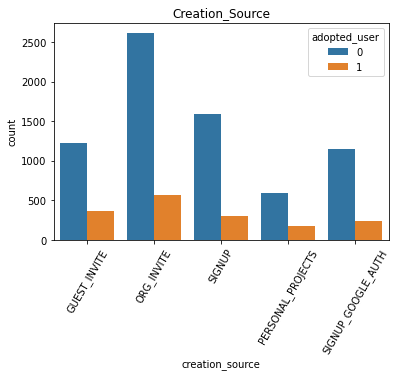

In [181]:
# creation source
sns.countplot(x='creation_source', data=data, hue='adopted_user')
plt.title('Creation_Source')
plt.xticks(rotation=60)
plt.show()

The probability of becoming a adopted user is more if a user is invited to an organization

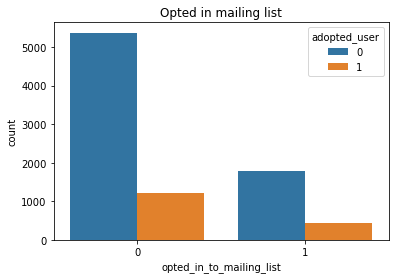

In [183]:
# opted_in_to_mailing_list
sns.countplot(x='opted_in_to_mailing_list', data=data, hue='adopted_user')
plt.title('Opted in mailing list')
plt.show()

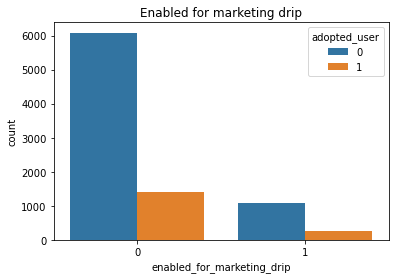

In [184]:
# enabled_for_marketing_drip
sns.countplot(x='enabled_for_marketing_drip', data=data, hue='adopted_user')
plt.title('Enabled for marketing drip')
plt.show()

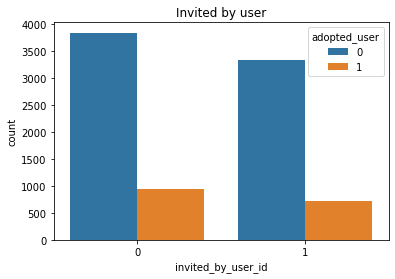

In [185]:
# invited_by_user_id
sns.countplot(x='invited_by_user_id', data=data, hue='adopted_user')
plt.title('Invited by user')
plt.show()

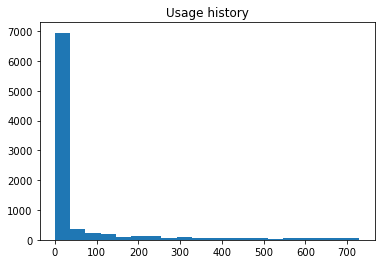

In [186]:
# Let's see the distribution of numerical features
plt.hist(data['usage_history'], bins=20)
plt.title('Usage history')
plt.show()

Mostly users are not active which is also consistent with the distribution of adopted user

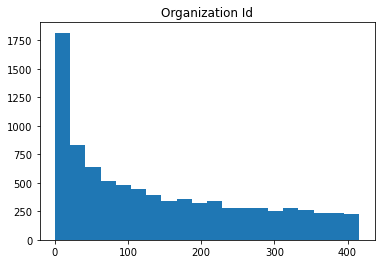

In [187]:
plt.hist(data['org_id'], bins=20)
plt.title('Organization Id')
plt.show()

Mostly users are not part of organization and thus most of organization ids are 0

### Modeling
The main goal of the modelling exercise is to predict whether or not a user will be adopted user or not and what are the factors affecting the same. The important factors will then by analysed such that changing those factors can attract the users or not.
This is a classification problem and several algorithms are available for the classification, some of which are:
1. Logistic Regression
2. Random Forest Classifier
3. Decision Tree Classifier
4. Support Vector Machine
5. Adaboost
6. K-nearest neighbor
7. Naive Bayes Classifier
8. XGBoost

The models to be adopted for any data science problem are chosen from the experiments by seeing the metrics of success. Some of the algortihms have been experimented below:

#### Data preparation for modeling

In [189]:
data_modeling = pd.get_dummies(data, drop_first=True)
X = data_modeling.drop(columns='adopted_user')
y = data_modeling['adopted_user']
print(X.info())
y.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   opted_in_to_mailing_list            8823 non-null   int64
 1   enabled_for_marketing_drip          8823 non-null   int64
 2   org_id                              8823 non-null   int64
 3   invited_by_user_id                  8823 non-null   int32
 4   usage_history                       8823 non-null   int64
 5   creation_source_ORG_INVITE          8823 non-null   uint8
 6   creation_source_PERSONAL_PROJECTS   8823 non-null   uint8
 7   creation_source_SIGNUP              8823 non-null   uint8
 8   creation_source_SIGNUP_GOOGLE_AUTH  8823 non-null   uint8
dtypes: int32(1), int64(4), uint8(4)
memory usage: 733.6 KB
None


0    0
1    1
2    0
3    0
4    0
Name: adopted_user, dtype: int64

In [190]:
# Split the data into test and train and standardize the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

#### Modelling experiments

Cross Validation Accuracy: 0.9514829220580371
Best parameter from Cross Validation: {'criterion': 'gini', 'max_depth': 2}
Accuracy: 0.9446962828649139
Precision: 0.8146551724137931
Recall: 0.9130434782608695
F1-score: 0.8610478359908883
Roc-AUC: 0.9325262034161491


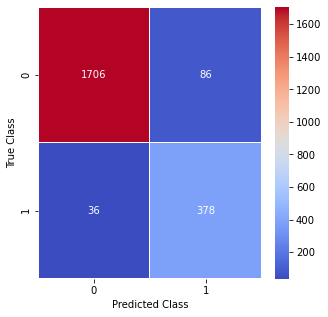

In [191]:
# 1. Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, roc_auc_score
criterion = ['gini', 'entropy']
max_depth = list(np.arange(2,41,2))
max_depth.append(None)
param_grid = {'criterion':criterion, 'max_depth':max_depth}
dtc = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dtc_cv = GridSearchCV(dtc, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
dtc_cv.fit(X_train, y_train)
y_pred = dtc_cv.predict(X_test)
print('Cross Validation Accuracy:', dtc_cv.best_score_)
print('Best parameter from Cross Validation:', dtc_cv.best_params_)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))
print('Roc-AUC:', roc_auc_score(y_test, y_pred))
_ = plt.subplots(figsize= (5,5))
_ = sns.heatmap(confusion_matrix(y_test, y_pred, labels=dtc_cv.classes_), 
            annot=True, fmt='d', xticklabels=dtc_cv.classes_, yticklabels=dtc_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

Cross Validation Accuracy: 0.96130988020531
Best parameter from Cross Validation: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 20}
Accuracy: 0.9546690843155031
Precision: 0.8866995073891626
Recall: 0.8695652173913043
F1-score: 0.8780487804878048
Roc-AUC: 0.9219477872670806
Best parameter from Cross Validation: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 20}


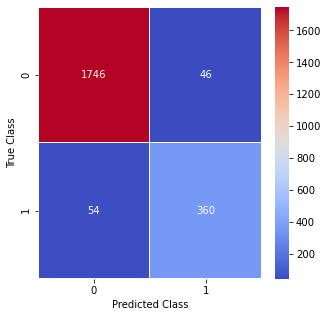

In [192]:
# 2. Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, roc_auc_score
max_features = ['auto', 'sqrt']
max_depth = list(np.arange(2,41,2))
max_depth.append(None)
n_estimators = [10,20,50,100,200,500]
criterion = ['gini', 'entropy']
param_grid = {'max_features':max_features, 'max_depth':max_depth, 'n_estimators':n_estimators, 'criterion':criterion}
rfc = RandomForestClassifier(random_state=42, class_weight='balanced_subsample')
rfc_cv = GridSearchCV(rfc, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
rfc_cv.fit(X_train, y_train)
y_pred = rfc_cv.predict(X_test)
print('Cross Validation Accuracy:', rfc_cv.best_score_)
print('Best parameter from Cross Validation:', rfc_cv.best_params_)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))
print('Roc-AUC:', roc_auc_score(y_test, y_pred))
print('Best parameter from Cross Validation:', rfc_cv.best_params_)
_ = plt.subplots(figsize= (5,5))
_ = sns.heatmap(confusion_matrix(y_test, y_pred, labels=rfc_cv.classes_), 
            annot=True, fmt='d', xticklabels=rfc_cv.classes_, yticklabels=rfc_cv.classes_, cmap='coolwarm', linewidths=0.2)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

Accuracies are very good and Random Forest Classifier is slightly better than Decision Tree Classifier.
Now lets look at the features which affects the most for prediction of adopted user.

                              Feature  Importance_Factor
3                  invited_by_user_id           0.001797
8  creation_source_SIGNUP_GOOGLE_AUTH           0.002126
6   creation_source_PERSONAL_PROJECTS           0.002473
5          creation_source_ORG_INVITE           0.002733
7              creation_source_SIGNUP           0.003174
1          enabled_for_marketing_drip           0.003186
0            opted_in_to_mailing_list           0.004746
2                              org_id           0.083027
4                       usage_history           0.896739


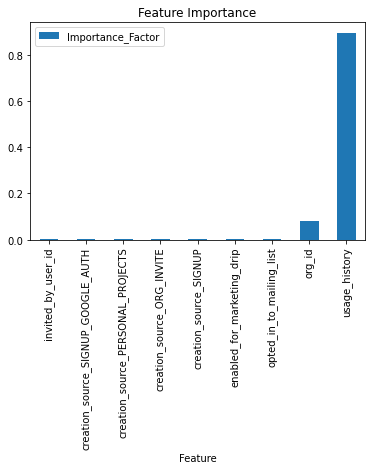

In [201]:
feature_imp = pd.DataFrame(list(zip(X.columns, rfc_cv.best_estimator_.feature_importances_)), columns=['Feature', 'Importance_Factor'])
feature_imp.sort_values('Importance_Factor', inplace=True)
print(feature_imp)
feature_imp.plot(x='Feature', y='Importance_Factor', kind='bar')
plt.title('Feature Importance')
plt.show()

The most important feature for a user to become adopted user is its usage history that means we have to attract the users to login in to the website.

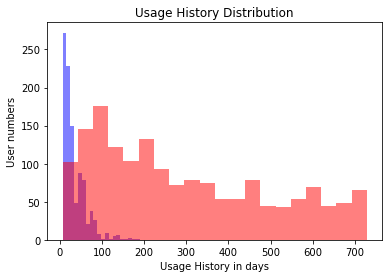

In [218]:
plt.hist(data[(data['adopted_user']==0) & (data['usage_history']>5)]['usage_history'], bins=20, color='blue', alpha=0.5)
plt.hist(data[(data['adopted_user']==1) & (data['usage_history']>5)]['usage_history'], bins=20, color='red', alpha=0.5)
plt.title('Usage History Distribution')
plt.ylabel('User numbers')
plt.xlabel('Usage History in days')
plt.show()